# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import pprint 


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kyzyl-suu
Processing Record 2 of Set 1 | mo i rana
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | callao
Processing Record 5 of Set 1 | papatowai
Processing Record 6 of Set 1 | saint-pierre
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | labytnangi
Processing Record 9 of Set 1 | richards bay
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | talnakh
Processing Record 12 of Set 1 | suntar
Processing Record 13 of Set 1 | baley
Processing Record 14 of Set 1 | queenstown
Processing Record 15 of Set 1 | turaif
Processing Record 16 of Set 1 | tazacorte
Processing Record 17 of Set 1 | yeppoon
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | afaahiti
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | invercargill
Processing Record 22 of Set 1 | polyarnyy
Processing Record 23 of Set 1 | puerto na

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          544
Lat           544
Lng           544
Max Temp      544
Humidity      544
Cloudiness    544
Wind Speed    544
Country       544
Date          544
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kyzyl-suu,42.3414,78.0056,-2.39,51,94,1.47,KG,1707193374
1,mo i rana,66.3128,14.1428,-11.74,85,98,2.24,NO,1707193374
2,waitangi,-43.9535,-176.5597,18.79,87,97,8.34,NZ,1707193375
3,callao,-12.0667,-77.1500,28.18,73,75,7.20,PE,1707193375
4,papatowai,-46.5619,169.4708,15.06,98,100,2.08,NZ,1707193375


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kyzyl-suu,42.3414,78.0056,-2.39,51,94,1.47,KG,1707193374
1,mo i rana,66.3128,14.1428,-11.74,85,98,2.24,NO,1707193374
2,waitangi,-43.9535,-176.5597,18.79,87,97,8.34,NZ,1707193375
3,callao,-12.0667,-77.1500,28.18,73,75,7.20,PE,1707193375
4,papatowai,-46.5619,169.4708,15.06,98,100,2.08,NZ,1707193375


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

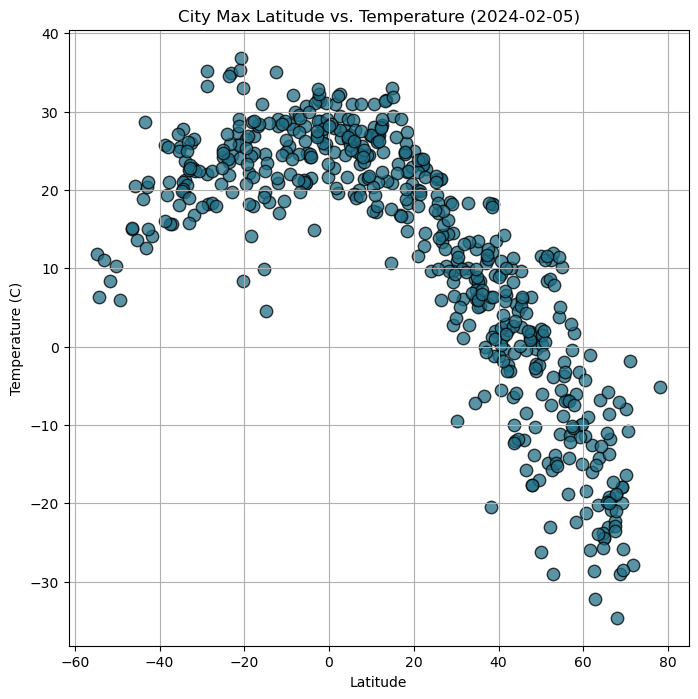

<Figure size 640x480 with 0 Axes>

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(x_values,y_values,s=80, marker='o', c='#216F86',alpha=.75, edgecolors='black')
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.title('City Max Latitude vs. Temperature (2024-02-05)')
plt.grid()
plt.show()
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

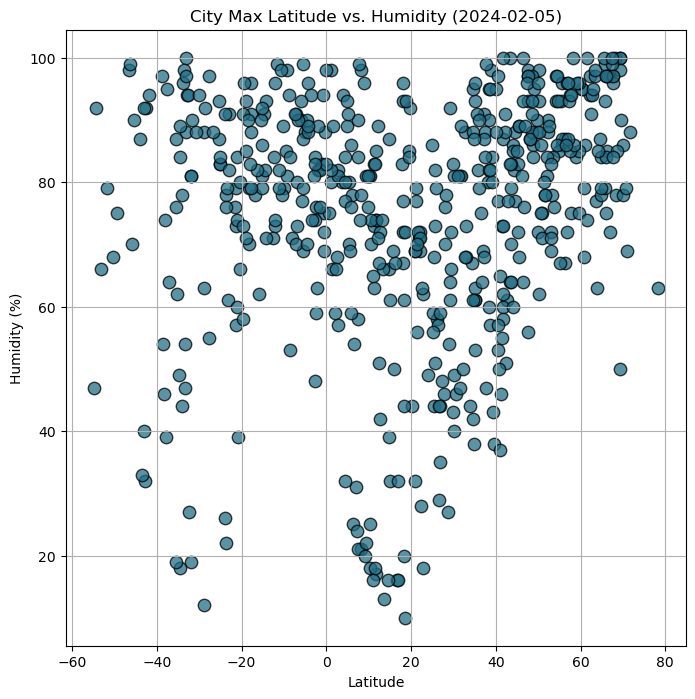

<Figure size 640x480 with 0 Axes>

In [10]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(x_values,y_values,s=80, marker='o', c='#216F86',alpha=.75, edgecolors='black')
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Max Latitude vs. Humidity (2024-02-05)')
plt.grid()
plt.show()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

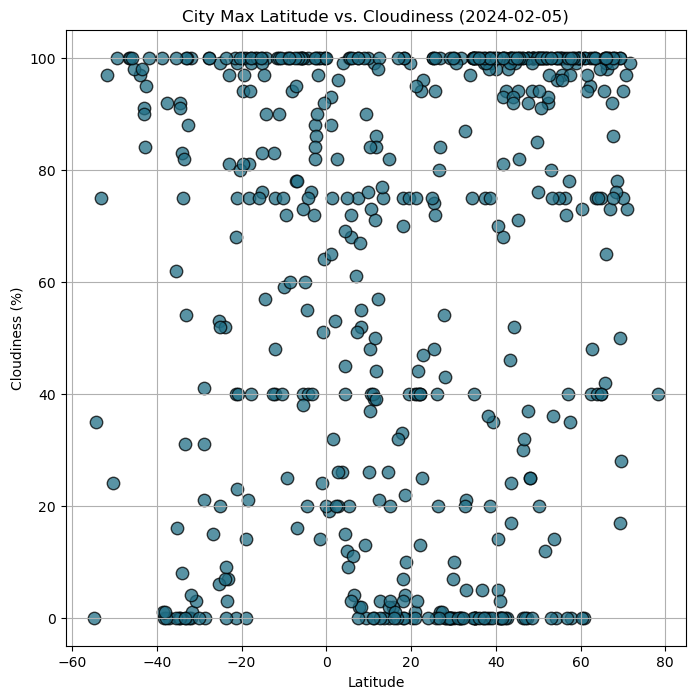

<Figure size 640x480 with 0 Axes>

In [11]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(x_values,y_values,s=80, marker='o', c='#216F86',alpha=.75, edgecolors='black')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Max Latitude vs. Cloudiness (2024-02-05)')
plt.grid()
plt.show()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

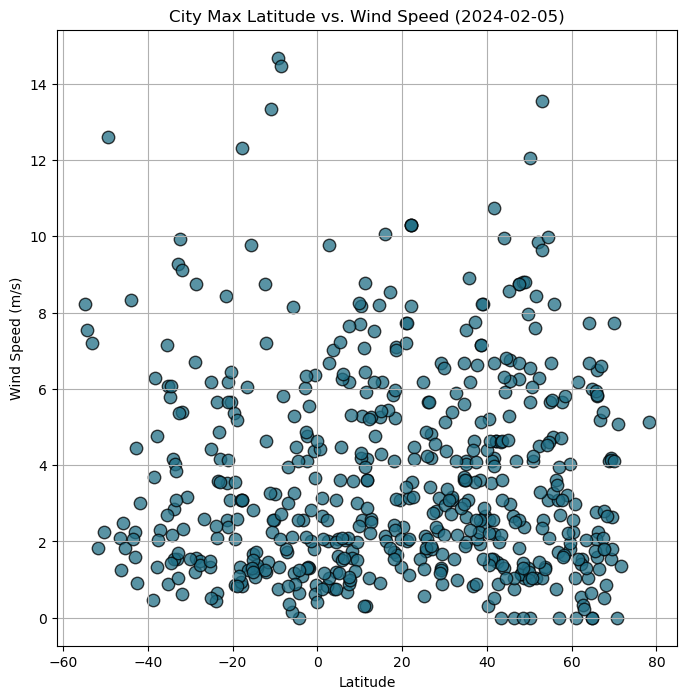

<Figure size 640x480 with 0 Axes>

In [12]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(x_values,y_values,s=80, marker='o', c='#216F86',alpha=.75, edgecolors='black')
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Max Latitude vs. Wind Speed (2024-02-05)')
plt.grid()
plt.show()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df=city_data_df[(city_data_df["Lat"]>= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aykhal,66.0000,111.5000,-21.43,100,100,2.36,RU,1707169269
1,meadow lakes,61.6247,-149.6011,0.35,85,0,0.00,US,1707169270
3,crane,31.3974,-102.3501,15.11,36,4,2.11,US,1707169270
4,nemuro,43.3236,145.5750,-7.71,78,98,5.79,JP,1707169270
6,kegen,43.0197,79.2203,-13.83,77,100,2.92,KZ,1707169271


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df=city_data_df[(city_data_df["Lat"]< 0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,west island,-12.1568,96.8225,26.99,89,100,3.09,CC,1707169270
5,trujillo,-8.1160,-79.0300,25.98,69,40,4.63,PE,1707169144
8,grytviken,-54.2811,-36.5092,6.99,74,90,5.79,GS,1707169271
9,puerto natales,-51.7236,-72.4875,15.25,38,20,15.43,CL,1707169271
11,port-aux-francais,-49.3500,70.2167,5.94,82,99,12.42,TF,1707169272


###  Temperature vs. Latitude Linear Regression Plot

r-value: 0.7317614067320556


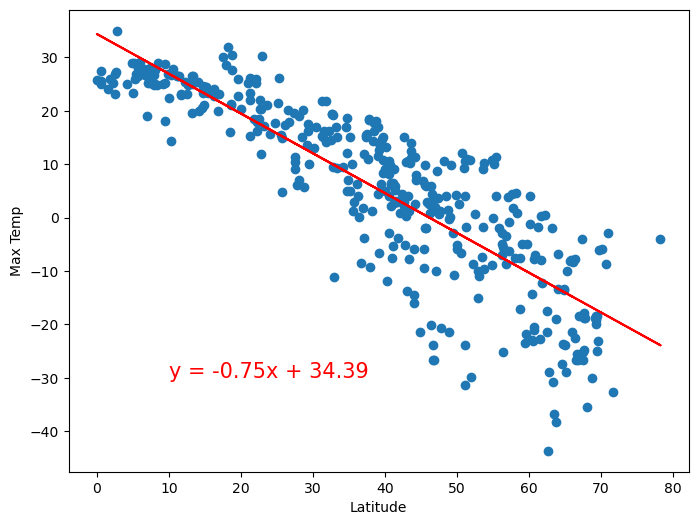

In [23]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regressval = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x_values,y_values)
 
plt.plot(x_values,regressval,"r-")
plt.annotate(line_equation,(10,-30),fontsize=15,color="red")
 
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"r-value: {rvalue**2}")
 
plt.show()

r-value: 0.19518184059045252


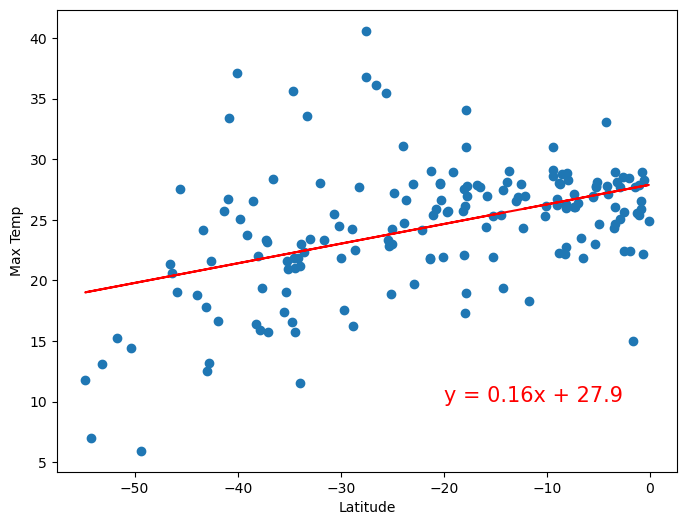

In [25]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regressval = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x_values,y_values)
 
plt.plot(x_values,regressval,"r-")
plt.annotate(line_equation,(-20,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"r-value: {rvalue**2}")
 
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
 # Response to the linear regression there is a negative correlation between Lattitude and max temp in the northern hemisphere. 
# Response continued: There is a slight positive correlation to lattitude and max temp in the southern hemisphere

### Humidity vs. Latitude Linear Regression Plot

r-value: 0.16306602846394974


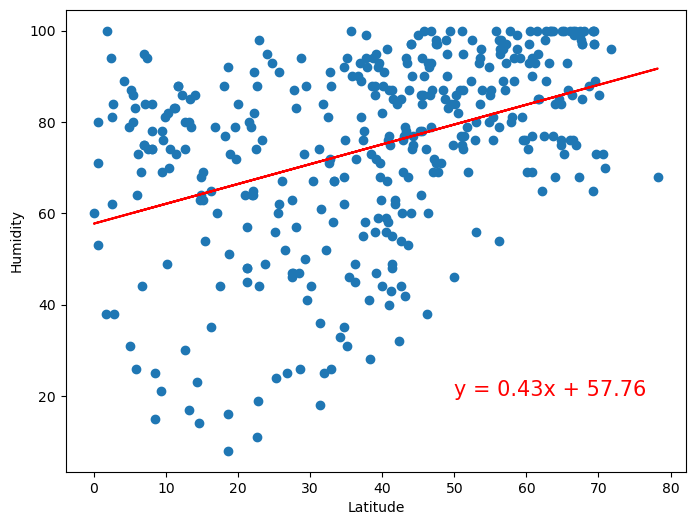

In [26]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regressval = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(x_values,y_values)
 
plt.plot(x_values,regressval,"r-")
plt.annotate(line_equation,(50,20),fontsize=15,color="red")
 
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"r-value: {rvalue**2}")
 
plt.show()

R-value: 0.24030441338625


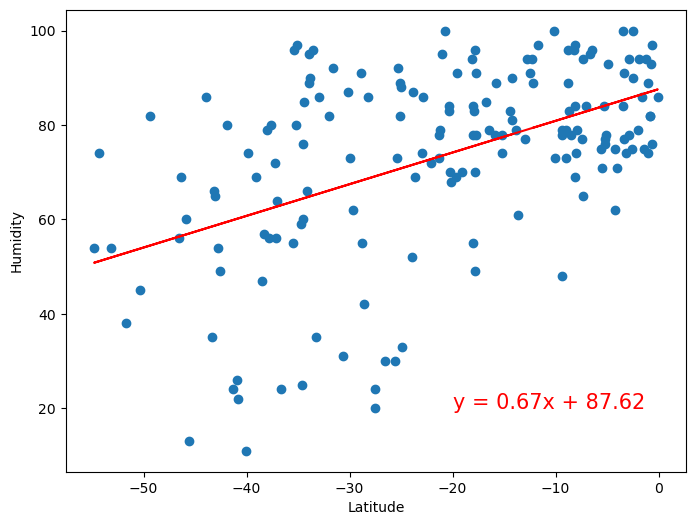

In [18]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regressval = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x_values,y_values)
 
plt.plot(x_values,regressval,"r-")
plt.annotate(line_equation,(-20,20),fontsize=15,color="red")
 
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"R-value: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# there is a slight positive correlation to humidity and lattitude in the northern hemisphere
# there is relatively weak positive correlation to humidity and lattitude in the southern hemisphere

### Cloudiness vs. Latitude Linear Regression Plot

R-value: 0.05957011749377622


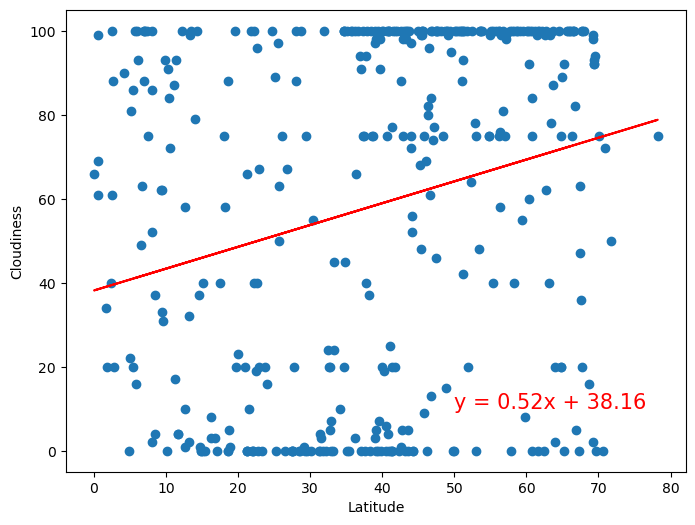

In [19]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regressval = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x_values,y_values)
 
plt.plot(x_values,regressval,"r-")
plt.annotate(line_equation,(50,10),fontsize=15,color="red")
 
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"R-value: {rvalue**2}")
 
plt.show()

R-value: 0.03590337735191212


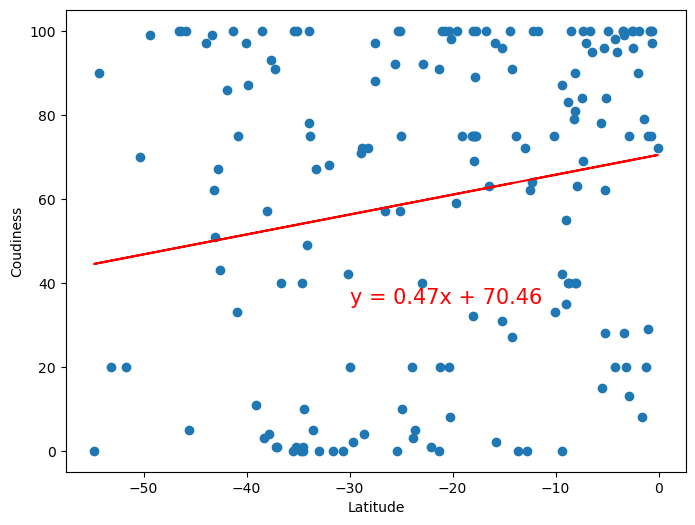

In [20]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regressval = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(x_values,y_values)
 
plt.plot(x_values,regressval,"r-")
plt.annotate(line_equation,(-30,35),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Coudiness')

print(f"R-value: {rvalue**2}")
 
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# there is a weak postive correlation between cloudiness and lattitude in both the southern and northern where both have very scatterered points

### Wind Speed vs. Latitude Linear Regression Plot

R-value: 0.020781778542924186


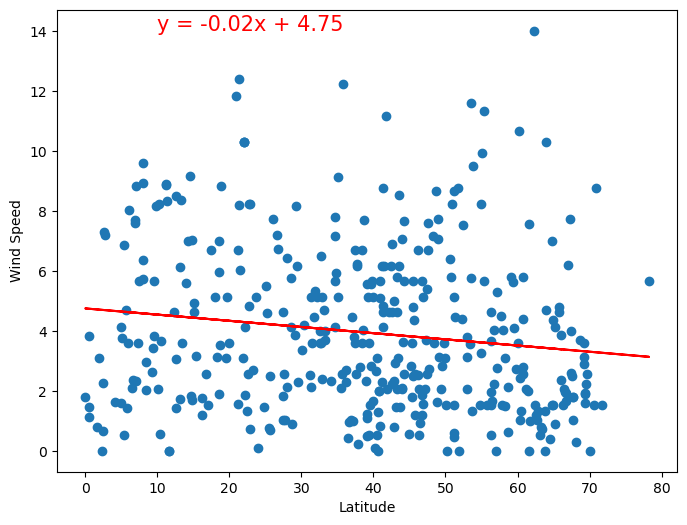

In [27]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regressval = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x_values,y_values)
 
plt.plot(x_values,regressval,"r-")
plt.annotate(line_equation,(10,14),fontsize=15,color="red")
 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"R-value: {rvalue**2}")

plt.show()

R-value: 0.12177886013587444


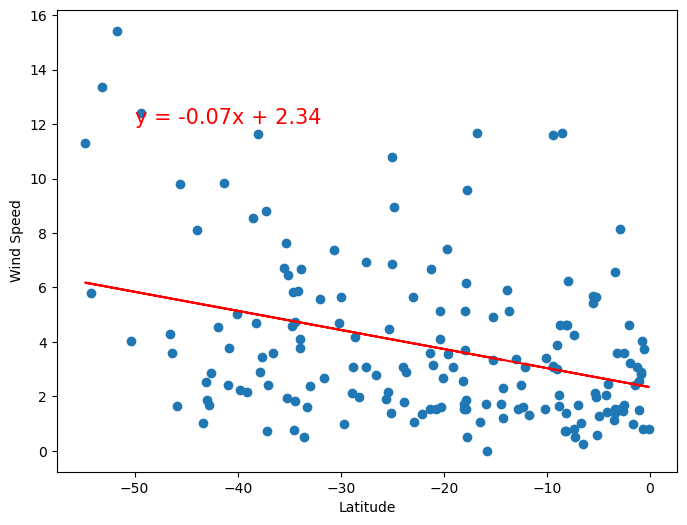

In [22]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regressval = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(x_values,y_values)
 
plt.plot(x_values,regressval,"r-")
plt.annotate(line_equation,(-50,12),fontsize=15,color="red")
 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"R-value: {rvalue**2}")
 
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# there is a weak negative correlation between wind speed and lattitude in both the southern and northern where both have very scatterered points